In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import math
import pylab as P
import PIL

In [2]:
N = 256
Sig = 10
m = 30
rMat = np.random.rand(N,N)
mMat = [[m for x in list(range(N))] for y in list(range(N))]
Mat = mMat + Sig*rMat

In [3]:
print type(Mat[0,0]), Mat[0,0]

<type 'numpy.float64'> 32.6012038621


In [4]:
size = (N,N)
im = Image.new('RGB',size)
pix = im.load()
print type(pix)
print type(Mat[0,0])
#for i in range(size[0]):
#    for j in range(size[1]):
#        pix[i,j] = Mat[i,j]

<type 'PixelAccess'>
<type 'numpy.float64'>


<type 'numpy.ndarray'>
(256, 256)


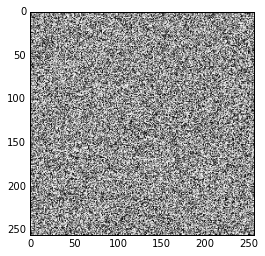

In [5]:
print type(Mat)
print Mat.shape
imgplot = plt.imshow(Mat, cmap="Greys_r")

In [6]:
def R(x,y):
    return math.sqrt(pow(x,2) + pow(y,2))
def Theta(x,y):
    return math.atan(x/y)

In [7]:
def gradient(Mat, i, j):
    g = [0.5*(Mat[i+1,j]+ Mat[i+1,j+1] -Mat[i,j] -Mat[i, j+1])
         , 0.5*(Mat[i+1,j+1] - Mat[i+1,j] + Mat[i,j] - Mat[i, j+1])]
    return g

In [8]:
all_gradient = [gradient(Mat, i,j) for i in range(1,255) for j in range(1,255) ] 

In [9]:
def f(x,y):
    d = float(1)/(float(math.sqrt(2*math.pi))*pow(float(2*pow(Sig,2)),2))*math.exp(-pow(x,2)/(float(4*pow(Sig,2)))-pow(y,2)/(float(4*pow(Sig,2))))   
    return d
def fr(r):
    d = float(1)/(4*float(pow(Sig,2)*pow(math.pi,2)))*math.exp(-pow(r,2)/(float(4*pow(Sig,2))))*r
    return d

In [10]:
A = [(Mat[i,j+1] - Mat[i+1, j]) for i in range(1,255) for j in range(1,255)]
B = [(Mat[i+1,j+1] - Mat[i, j]) for i in range(1,255) for j in range(1,255)]

In [11]:
Rxy = [R(x,y) for (x,y) in zip(A,B)]

In [12]:
Thetaxy = [Theta(x,y) for (x,y) in zip(A,B)]

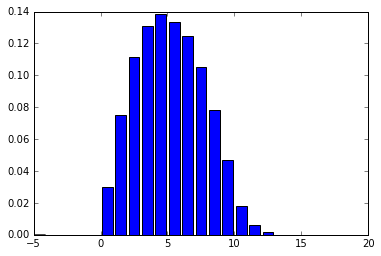

In [13]:
P.figure()

bins = [i for i in range(-5,18)]
# the histogram of the data with histtype='step'
n, bins, patches = P.hist(Rxy, bins, normed=1, histtype='bar', rwidth=0.8)


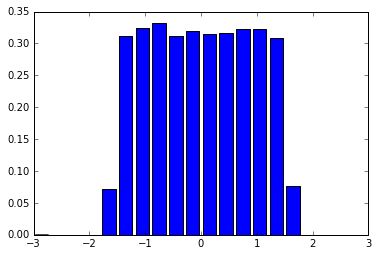

In [14]:
P.figure()

bins = [0.3*i for i in range(-10,10)]
# the histogram of the data with histtype='step'
n, bins, patches = P.hist(Thetaxy, bins, normed=1, histtype='bar', rwidth=0.8)

In [15]:
X = np.linspace(-10, +15, 100)
Y = np.linspace(-10, +15, 100)
Fxy = [f(x,y) for (x,y) in zip(X,Y)]

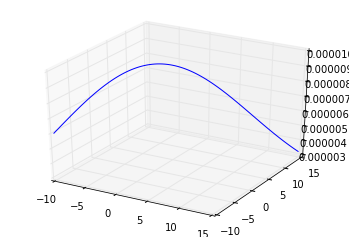

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(X, Y, Fxy)

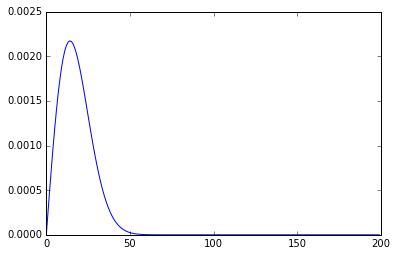

In [17]:
Rp = np.asarray([i/5 for i in range(0, 1000)])
FRp = np.asarray([fr(r) for r in Rp])
plt.plot(Rp, FRp)

In [18]:
from PIL import Image
path = "/Users/sarahlenet/Documents/Pictures/SunDown.jpg"
path2 = "/Users/sarahlenet/Downloads/IMG_4402.JPG"
im2 = Image.open(path).convert('L')

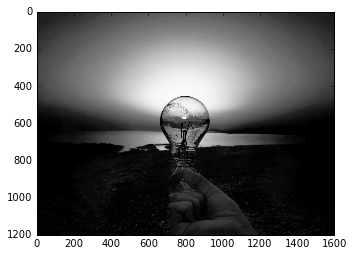

In [19]:
imgplot2 = plt.imshow(im2, cmap="Greys_r")

In [20]:
im22 = im2.resize((256, 256), PIL.Image.ANTIALIAS)

In [21]:
print type(im2)

<class 'PIL.Image.Image'>


In [22]:
print im2

<PIL.Image.Image image mode=L size=1600x1200 at 0x10A99FFD0>


In [23]:
img_as_np = np.asarray(im22)
print type(img_as_np), img_as_np

<type 'numpy.ndarray'> [[23 23 25 ..., 22 22 22]
 [23 25 25 ..., 23 22 22]
 [24 25 24 ..., 25 23 22]
 ..., 
 [ 0  4  9 ...,  1  0  0]
 [ 0  0  0 ...,  6  1  1]
 [ 0  0  1 ...,  8  8  7]]


In [24]:
all_gradient = [gradient(img_as_np, i,j) for i in range(1,255) for j in range(1,255) ] 

In [25]:
A2 = [(img_as_np[i,j+1] - img_as_np[i+1, j]) for i in range(1,255) for j in range(1,255)]
B2 = [(img_as_np[i+1,j+1] - img_as_np[i, j]) for i in range(1,255) for j in range(1,255)]

In [26]:
Rxy2 = [R(x,y) for (x,y) in zip(A2,B2)]

In [27]:
Thetaxy2 = [Theta(x,y) for (x,y) in zip(A2,B2)]

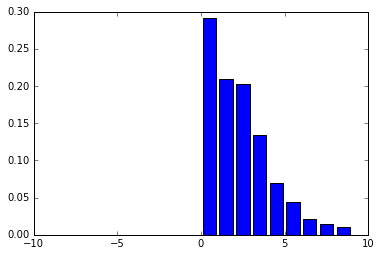

In [28]:
P.figure()

bins = [i/10 for i in range(-100,100)]
# the histogram of the data with histtype='step'
n, bins, patches = P.hist(Rxy2, bins, normed=1, histtype='bar', rwidth=0.8)


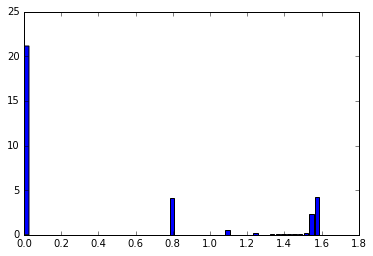

In [29]:
P.figure()

bins = [0.03*i for i in range(0,60)]
# the histogram of the data with histtype='step'
n, bins, patches = P.hist(Thetaxy2, bins, normed=1, histtype='bar', rwidth=0.8)